In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from cw2 import sorted_barplot

from scipy.stats import norm

data = sio.loadmat('tennis_data.mat')

W = data['W']
for i, player in enumerate(W):
    W[i] = player[0]
    
G = data['G'] - 1

# Number of players
M = W.shape[0]

# Number of Games
N = G.shape[0]

print('M =', M)
print('N =', N)

# -----------------------------------------

names = ['Novak-Djokovic', 'Rafael-Nadal', 'Roger-Federer', 'Andy-Murray']
ATP_top_players = []

for name in names:
    index = np.where(W == name)[0][0]
    ATP_top_players.append(index)

print(ATP_top_players)

M = 107
N = 1801
[15, 0, 4, 10]


In [2]:
skill_samples = np.load('a_result/skill_samples0(30000iters).npy')
skill_samples.shape

(107, 30000)

Correlation b/w two players' sampled skills 

In [3]:
pd.Series.corr(pd.Series(skill_samples[15,:]), pd.Series(skill_samples[0,:]))

0.23608831975590916

# Compare the skills of Djokovic [15] and Nadal [0].

## d.1) approximate marginal skills by GaussianS (from samples)

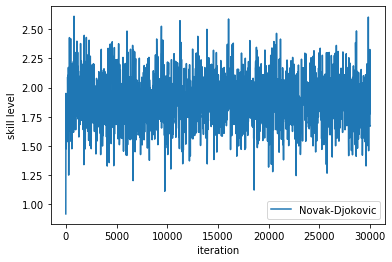

In [4]:
# Thinning

i_thinning = 15
thinned_samples = skill_samples[:,::i_thinning]
n_thinned = thinned_samples.shape[1]

x = np.linspace(0,n_thinned*i_thinning ,n_thinned)

p = 15
plt.plot(x, thinned_samples[p,:], label = W[p][0])
plt.xlabel('iteration')
plt.ylabel('skill level')

plt.legend()

1.4803520896193094
0.03714406457615331


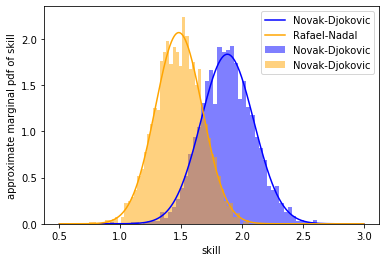

In [5]:
p1 = 15
p2 = 0

# p1 = 4
# p2 = 10

p1_thinned_samples = thinned_samples[p1,:]
p2_thinned_samples = thinned_samples[p2,:]

mean1_apx = np.mean(p1_thinned_samples)
var1_apx = np.var(p1_thinned_samples)

mean2_apx = np.mean(p2_thinned_samples)
var2_apx = np.var(p2_thinned_samples)

print(mean2_apx)
print(var2_apx)

x_ = np.linspace(0.5, 3, 10000)

plt.plot(x_, norm.pdf(x_, mean1_apx, np.sqrt(var1_apx)), label = W[p1][0], color='blue')
plt.plot(x_, norm.pdf(x_, mean2_apx, np.sqrt(var2_apx)), label = W[p2][0], color='orange')

plt.hist(p1_thinned_samples, bins=50, label = W[p][0], alpha = 0.5, density=True, color='blue')
plt.hist(p2_thinned_samples, bins=50, label = W[p][0], alpha = 0.5, density=True, color='orange')

plt.xlabel('skill')
plt.ylabel('approximate marginal pdf of skill')
plt.legend()

plt.savefig('d_result/d_marginal.jpg')

prob of higher skill

In [6]:
new_mean_marg = mean1_apx - mean2_apx
new_var_marg = var1_apx + var2_apx

print('prob of higher skill =', 1 - norm.cdf(0, new_mean_marg, np.sqrt(new_var_marg)) )



prob of higher skill = 0.9152362700829846


## d.2) approximate joint skills by ONE Gaussian (from samples)

In [7]:
p1_thinned_samples
p2_thinned_samples

array([0.74497722, 1.53495451, 1.2306507 , ..., 1.7579308 , 1.55018342,
       1.47801868])

D:\Anaconda3\Lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


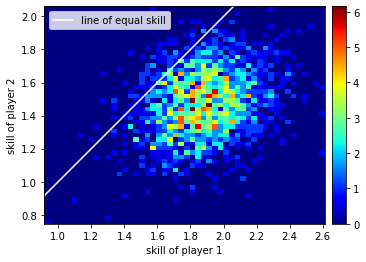

In [8]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

xlim = [0.9,2.7]
ylim = [0.7,2.1]

# x, y = np.mgrid[xlim[0]:xlim[1]:.01, ylim[0]:ylim[1]:.01]
# pos = np.empty(x.shape + (2,))
# pos[:, :, 0] = x
# pos[:, :, 1] = y

# fig = plt.figure(figsize=(10,10))
# plt.contourf(x, y, rv.pdf(pos))
plt.plot(np.linspace(-2,+3,endpoint=True), np.linspace(-2,+3,endpoint=True), 'w', label = 'line of equal skill')

plt.hist2d(p1_thinned_samples, p2_thinned_samples, bins=(50, 50), cmap=plt.cm.jet, density=True)

plt.legend()
plt.xlabel('skill of player 1')
plt.ylabel('skill of player 2')

ax1 = plt.axes()
ax1.set_aspect('equal')

# plt.xlim(xlim)
# plt.ylim(ylim)

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)

plt.colorbar(ax=ax1, cax=cax1)

plt.show()

D:\Anaconda3\Lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


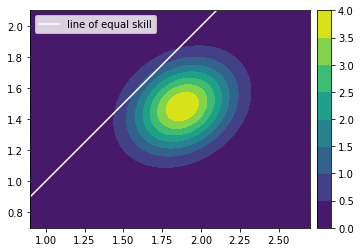

In [9]:
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Estimate joint Gaussian from samples.

joint_samples = np.stack((p1_thinned_samples, p2_thinned_samples), axis=0)
mean_vector = np.mean(joint_samples, axis = 1)
cov_matrix = np.cov(joint_samples)

# -----------------------------------------------------------------------
# plot contour for Gaussian

xlim = [0.9,2.7]
ylim = [0.7,2.1]

x, y = np.mgrid[xlim[0]:xlim[1]:.01, ylim[0]:ylim[1]:.01]

pos = np.empty(x.shape + (2,))
# print(pos.shape)
pos[:, :, 0] = x
pos[:, :, 1] = y
# print(pos)
rv = multivariate_normal(mean_vector, cov_matrix)

# fig = plt.figure(figsize=(10,10))
plt.contourf(x, y, rv.pdf(pos))

plt.plot(np.linspace(xlim[0],xlim[1],endpoint=True), np.linspace(xlim[0],xlim[1],endpoint=True), 'w', label = 'line of equal skill')
plt.legend()

plt.xlim(xlim)
plt.ylim(ylim)

# -----------------------------------------------------------
ax2 = plt.axes()
ax2.set_aspect('equal')

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)

plt.colorbar(ax=ax2, cax=cax2)

# -----------------------------------------------------------



D:\Anaconda3\Lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


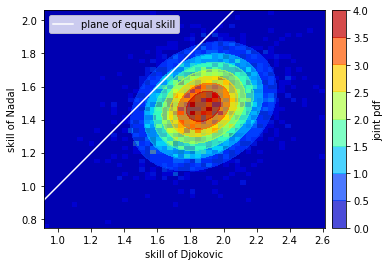

In [10]:
plt.figure()

ax1 = plt.axes()
ax1.set_aspect('equal')
plt.hist2d(p1_thinned_samples, p2_thinned_samples, bins=(50, 50), cmap=plt.cm.jet, density=True)

ax2 = plt.axes()
ax2.set_aspect('equal')
plt.contourf(x, y, rv.pdf(pos), alpha = 0.7, cmap=plt.cm.jet)

plt.plot(np.linspace(-2,+3,endpoint=True), np.linspace(-2,+3,endpoint=True), 'w', label = 'plane of equal skill')

plt.legend()
plt.xlabel('skill of Djokovic')
plt.ylabel('skill of Nadal')

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb = plt.colorbar(ax=ax2, cax=cax)
cb.set_label('joint pdf')

# plt.show()
plt.savefig('d_result/d_joint.jpg')

Compute the volumn under the 2D Gaussian

D:\Anaconda3\Lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(-0.7, 0.7)

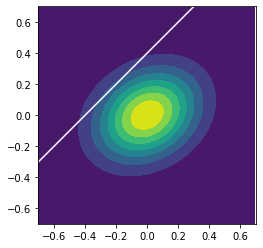

In [11]:
xlim = [-0.7,0.7]
ylim = [-0.7,0.7]

x, y = np.mgrid[xlim[0]:xlim[1]:.01, ylim[0]:ylim[1]:.01]
# x, y = np.mgrid[xlim[0]:xlim[1]:.0005, ylim[0]:ylim[1]:.0005]

pos = np.empty(x.shape + (2,))
# print(pos.shape)
pos[:, :, 0] = x
pos[:, :, 1] = y


zero_mean_line_x = np.linspace(1,2.5,endpoint=True) - mean_vector[0]
zero_mean_line_y = np.linspace(1,2.5,endpoint=True) - mean_vector[1]
zero_mean_line = np.stack((zero_mean_line_x, zero_mean_line_y), axis = 0)
# print(zero_mean_line)

zero_mean_grid = np.stack((x, y), axis = 0)


grid_size = zero_mean_grid.shape[1]


plt.plot(zero_mean_line_x, zero_mean_line_y,
         'w', label = 'plane of equal skill')

rv = multivariate_normal(mean_vector - mean_vector, cov_matrix)

zero_mean_rv_grid = rv.pdf(pos)

plt.contourf(x, y, zero_mean_rv_grid)



ax2 = plt.axes()
ax2.set_aspect('equal')

plt.xlim(xlim)
plt.ylim(ylim)

D:\Anaconda3\Lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(140, 140)

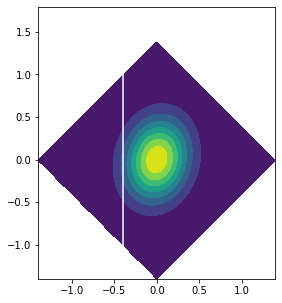

In [12]:
# Rotate the grid by 45 degs.

rotation_matrix = np.array([[1,-1],[1,1]])

zero_mean_grid_2d = np.reshape(zero_mean_grid, (2,grid_size*grid_size), order='F')

# This is how you will restore the dimension after applying the rotation matrix.
# zero_mean_grid_3d = np.reshape(zero_mean_grid_2d, (2,140,140), order='F')

zero_mean_grid_rotated_2d = np.dot(rotation_matrix, zero_mean_grid_2d)
zero_mean_grid_rotated = np.reshape(zero_mean_grid_rotated_2d, (2,grid_size,grid_size), order='F')

# ------------------------------------------------------------------------------------------
# Rotate the line of equal skill by 45 degs.

zero_mean_line_rotated = np.dot(rotation_matrix, zero_mean_line)

# ------------------------------------------------------------------------------------------
# Plot the rotated Gaussian to verify its shape has not changed.

plt.figure(figsize=(5,5))

plt.contourf(zero_mean_grid_rotated[0], zero_mean_grid_rotated[1], zero_mean_rv_grid)

plt.plot(zero_mean_line_rotated[0], zero_mean_line_rotated[1], 'w')

ax = plt.axes()
ax.set_aspect('equal')

# ------------------------------------------------------------------------------------------
# Finally reconstruct 2D Gaussian and find cdf.

# joint_samples = np.stack((p1_thinned_samples, p2_thinned_samples), axis=0)
# mean_vector = np.mean(joint_samples, axis = 1)
# cov_matrix = np.cov(joint_samples)

heights = zero_mean_rv_grid
heights.shape

In [13]:
thres_x = zero_mean_line_rotated[0][0]
print(thres_x)

new_x = zero_mean_grid_rotated[0]
new_y = zero_mean_grid_rotated[1]
# print(zero_mean_grid_rotated)
print(new_x.shape)
print(new_y.shape)
print(zero_mean_rv_grid.shape)

total_higher_skill_pdf = 0

for i in range(new_x.shape[0]):
    for j in range(new_x.shape[1]):
        if new_x[i,j] > thres_x:
            total_higher_skill_pdf += zero_mean_rv_grid[i,j]

print( 'prob of higher skill =', total_higher_skill_pdf / sum(sum(zero_mean_rv_grid)) )

-0.3990232701347669
(140, 140)
(140, 140)
(140, 140)
prob of higher skill = 0.9413199758720686


In [14]:
arr = np.array([[1,2],[3,4]])
sum(sum(arr))

10

## d.3) directly from samples

In [15]:
counter = 0

for i in range(len(p1_thinned_samples)):
    if p1_thinned_samples[i] > p2_thinned_samples[i]:
        counter += 1

print('prob of higher skill =', counter / len(p1_thinned_samples))

prob of higher skill = 0.9495
